# Collaboration and Competition


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from unityagents import UnityEnvironment
from agent import MultiAgent, Agent
from maddpg_learning import maddpg

In [2]:
# Initialize the Environment
env = UnityEnvironment(file_name="Tennis.app")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Get the action size
action_size = brain.vector_action_space_size

# Get the state size
state_size = len(env_info.vector_observations[0])

# Get number of agents
num_agents = len(env_info.agents)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
#Set hyperparameters

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256        # batch size
GAMMA = 0.99            # discount factor
TAU = 5e-2              # for soft update of target parameters
LR_ACTOR = 5e-4         # learning rate of the actor
LR_CRITIC = 5e-3        # learning rate of the critic
WEIGHT_DECAY = 0 #1e-4
UPDATE_EVERY = 1        # how often to update the network

AVERAGE_SCORE_SOLVED=0.5
EPSILON = 2
EPSILON_DECAY = 0.9999

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Torch device to use


In [4]:
#Initialize MADDPG agent and train it

multi_agent = MultiAgent(state_size=state_size,
                        action_size=action_size,
                        num_agents=num_agents,
                        buffer_size=BUFFER_SIZE,
                        batch_size=BATCH_SIZE,
                        gamma=GAMMA,
                        tau=TAU,
                        learning_rate_actor=LR_ACTOR,
                        learning_rate_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY,
                        device=device,
                        update_every=UPDATE_EVERY,
                        random_seed=42)

scores, rolling_average_scores, num_episodes_solved = maddpg(env=env,
                                                             agent=multi_agent,
                                                             num_agents=num_agents,
                                                             average_score_solved=AVERAGE_SCORE_SOLVED,
                                                             epsilon=EPSILON,
                                                             epsilon_decay=EPSILON_DECAY)


Episode 100	Average Score: 0.0188	Scores: [ 0.10 | 0.09 ]
total timesteps: 1638
epsilon: 1.6978096684759327
Episode 200	Average Score: 0.0287	Scores: [ 0.00 | -0.01 ]
total timesteps: 3441
epsilon: 1.4176916841810199
Episode 300	Average Score: 0.0505	Scores: [ 0.10 | -0.01 ]
total timesteps: 5991
epsilon: 1.0985786671929574
Episode 400	Average Score: 0.0818	Scores: [ 0.20 | 0.09 ]]
total timesteps: 9622
epsilon: 0.7640661325385036
Episode 500	Average Score: 0.1106	Scores: [ 0.10 | -0.01 ]
total timesteps: 14009
epsilon: 0.4927157372481189
Episode 600	Average Score: 0.1346	Scores: [ 0.10 | -0.01 ]
total timesteps: 19180
epsilon: 0.293772762890878
Episode 700	Average Score: 0.2181	Scores: [ 0.49 | 0.60 ]]
total timesteps: 27362
epsilon: 0.12961462702813087
Episode 800	Average Score: 0.2072	Scores: [ 0.10 | -0.01 ]
total timesteps: 35064
epsilon: 0.05999895394700727
Episode 900	Average Score: 0.2005	Scores: [ 0.09 | 0.20 ]]
total timesteps: 43423
epsilon: 0.026007509677501976
Episode 1000

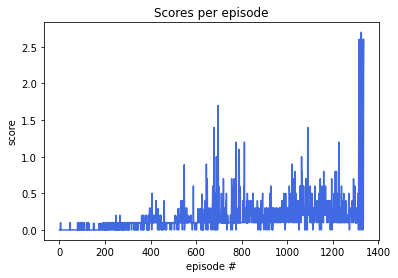

In [5]:
#Plot the training session (scores per episode averaged across all agents)

def plot_scores(scores):
    plt.plot(scores, color='royalblue')
    plt.title('Scores per episode')
    plt.ylabel('score')
    plt.xlabel('episode #')
    plt.show()
    
plot_scores(scores)


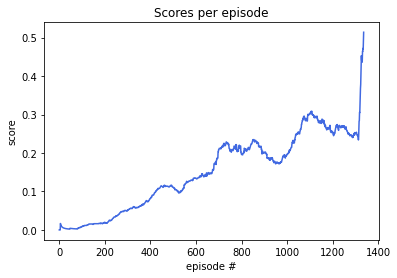

In [9]:
plot_scores(rolling_average_scores)

In [ ]:
#See the trained agent in action.
agent = multi_agent

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state

#Uncomment these lines to use a saved checkpoint:
#agent = Agent(state_size=state_size,
#              action_size=action_size,
#              num_agents=num_agents,
#              buffer_size=BUFFER_SIZE,
#              batch_size=BATCH_SIZE,
#              gamma=GAMMA,
#              tau=TAU,
#              learning_rate_actor=LR_ACTOR,
#              learning_rate_critic=LR_CRITIC,
#              device=device,
#              update_every=UPDATE_EVERY,
#              random_seed=42)
#agent.actor_local.load_state_dict(torch.load('solved_checkpoint_actor.pth'))

scores = np.zeros(num_agents) 
while True:
    actions = agent.act(states, 0.0, add_noise=False)   # select an action
    env_info = env.step(actions)[brain_name]       # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done                    # see if episode has finished
    states = next_states                           # roll over the state to next time step
    scores += rewards                              # update the score
    if np.any(dones):                              # exit loop if episode finished
        break
    
print("Max Score: {}".format(np.max(scores)))


In [ ]:
env.close()

In [ ]:
##
#random movement to start
#batch size (smaller?) - (remove batch norm?)
#buffer size 20-30k?
#update less

#weight decay?
#smaller model - no falloff?
#reduce model size more
#learning rate 
#noise
#weight decay

#use 2 agents (maddgp)

Episode 100	Average Score: 0.0039	Max Score: 0.00
total timesteps: 1488
noise_reduction: 1.7234700683890456
Episode 200	Average Score: 0.0428	Max Score: 0.10
total timesteps: 3800
noise_reduction: 1.367696830205545
Episode 300	Average Score: 0.0936	Max Score: 0.10
total timesteps: 7813
noise_reduction: 0.9155851709335942
Episode 400	Average Score: 0.1261	Max Score: 0.39
total timesteps: 12898
noise_reduction: 0.5506161727547662
Episode 500	Average Score: 0.2450	Max Score: 0.10
total timesteps: 22850
noise_reduction: 0.20352486861754124
Episode 600	Average Score: 0.2374	Max Score: 0.09
total timesteps: 32589
noise_reduction: 0.07684877299917996
Episode 700	Average Score: 0.2619	Max Score: 0.10
total timesteps: 43374
noise_reduction: 0.0261352656092265
Episode 800	Average Score: 0.4544	Max Score: 0.30
total timesteps: 61508
noise_reduction: 0.004262240235943729
Episode 810	Average Score: 0.5055	Max Score: 1.00
Environment solved in 710 episodes!	Average Score: 0.51

Episode 100	Average Score: 0.0188	Scores: [ 0.10 | 0.09 ]
total timesteps: 1638
epsilon: 1.6978096684759327
Episode 200	Average Score: 0.0287	Scores: [ 0.00 | -0.01 ]
total timesteps: 3441
epsilon: 1.4176916841810199
Episode 300	Average Score: 0.0505	Scores: [ 0.10 | -0.01 ]
total timesteps: 5991
epsilon: 1.0985786671929574
Episode 400	Average Score: 0.0818	Scores: [ 0.20 | 0.09 ]]
total timesteps: 9622
epsilon: 0.7640661325385036
Episode 500	Average Score: 0.1106	Scores: [ 0.10 | -0.01 ]
total timesteps: 14009
epsilon: 0.4927157372481189
Episode 600	Average Score: 0.1346	Scores: [ 0.10 | -0.01 ]
total timesteps: 19180
epsilon: 0.293772762890878
Episode 700	Average Score: 0.2181	Scores: [ 0.49 | 0.60 ]]
total timesteps: 27362
epsilon: 0.12961462702813087
Episode 800	Average Score: 0.2072	Scores: [ 0.10 | -0.01 ]
total timesteps: 35064
epsilon: 0.05999895394700727
Episode 900	Average Score: 0.2005	Scores: [ 0.09 | 0.20 ]]
total timesteps: 43423
epsilon: 0.026007509677501976
Episode 1000	Average Score: 0.1947	Scores: [ 0.20 | 0.09 ]
total timesteps: 51739
epsilon: 0.011321954844337142
Episode 1100	Average Score: 0.3018	Scores: [ 0.30 | 0.19 ]]
total timesteps: 64038
epsilon: 0.0033094507802188325
Episode 1200	Average Score: 0.2549	Scores: [ 0.30 | 0.19 ]]
total timesteps: 74290
epsilon: 0.0011871209248403853
Episode 1300	Average Score: 0.2500	Scores: [ 0.10 | 0.09 ]]
total timesteps: 84137
epsilon: 0.00044342870145495174
Episode 1337	Average Score: 0.5139	Scores: [ 2.60 | 2.60 ]]
Environment solved in 1237 episodes!	Average Score: 0.51	Total Time: 25 minutes 25 seconds